<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/05_warmup.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Lesson 05

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 04 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

# Solution

The earthquake data was retrieved from https://earthquake.usgs.gov/earthquakes/map/ and contains earthquakes above a magnitude of 6.0 between 1900 and 2023.

The file is CSV, comma delimited, which can be read by pandas. The file has a first row of column headings, which we can specify. 

Line 1:

    time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
Line 2 (data follows):

    2023-09-21T21:11:49.950Z,-14.0039,167.1898,188.419,6.1,mww,76,26,7.076,0.83,us,us7000kx7j,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33,reviewed,us,us

We can use pandas to parse the dates in the first column.

In [17]:
"""import libraries"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [18]:
"""read the Earthquake 6  data file"""

file_path_eq6 = r'C:\Users\janel\OneDrive\Documents\IU grad\Classes F23\EAS 690 Advanced Data Science\G690_Test\lesson05\usgs_major_earthquakes_1900-2023.csv'

#read in data file
eq_6_pd = pd.read_csv(file_path_eq6, header = 0, delimiter=',', parse_dates=[0]) 
eq_6_pd.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,2023-09-21T21:02:41.950Z,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us
2,2023-09-18 13:21:23.790000+00:00,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,2023-09-19T13:29:35.504Z,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49.0,reviewed,us,us
3,2023-09-13 11:49:15.926000+00:00,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,2023-09-14T11:52:11.466Z,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us
4,2023-09-12 11:03:18.873000+00:00,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,2023-09-18T13:59:24.715Z,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us


One thing I want to do with this data is look at the frequency distribution of earthquakes. The last coloquim speaker mentioned 'FMD', the frequency- magnitude distribution of earthquakes. The data should show many more magnitude 6.0-6.9 earthquakes than 7.0-7.9, and the magnitude 7 earthquakes should be even more than the 8s, etc. 

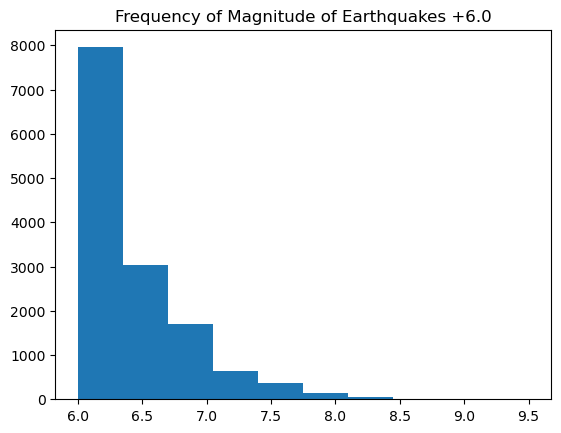

In [19]:
#create subplot
fig, (ax) = plt.subplots()

#first plot: frequency of magnitude using histogram
ax.hist(eq_6_pd['mag'], bins = 10) #how to define bin as range of values?

ax.set_title("Frequency of Magnitude of Earthquakes +6.0")

plt.show()

In [23]:
"""use groupby to calcualte sum of earthquakes within each year"""

#get year of each eq
eq_yrs = eq_6_pd['time'].dt.year

# use groupby to conglomerate by year
eq_yr_group = eq_6_pd.groupby(eq_yrs)

#count number in each year 
eq_yr_count = eq_yr_group['mag'].count()

# get the average magnitude in each year
eq_yr_mag = eq_yr_group['mag'].mean()


In [ ]:
""" Plot the average magnitude and total counts vs time. """

# make the figure
fig, (ax1, ax2) = plt.subplots()
ax1 = 

two time plots
mean mag over time (yr) and 
number of eqs over time

one extra plot of # of eqs per month. manually set month names ex 'jan', 'feb', .. 